In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns

In [2]:
# Load dataset
file = 'winequality-red.csv'
#header = ['fLength','fWidth','fSize','fConc','fConc1', 'fAsym', 'fM3Long','fM3Trans'
#          ,'fAlpha','fDist', 'class_name']
dataset=pd.read_csv(file,delimiter=';')#,names=header)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [54]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [55]:
print(dataset.groupby('quality').size())

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


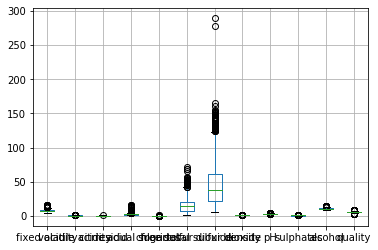

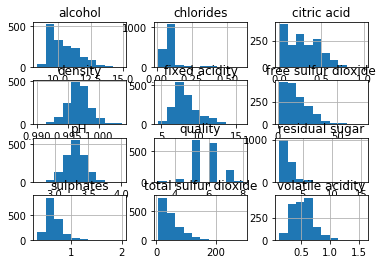

In [56]:
dataset.boxplot()
dataset.hist()
plt.show()

In [3]:
#convert class to binary. loc is for labels, iloc is for num positions. Don't know why 'or' doesn't work here (never go to else)
#for i in range(len(dataset)):
#    if dataset.loc[i,'class_name']=='g':
#        dataset.loc[i,'class_name']=0
#    else:
#        dataset.loc[i,'class_name']=1
        
dataset.quality.loc[(dataset['quality'] == 3)] = 0
dataset.quality.loc[(dataset['quality'] == 4)] = 0
dataset.quality.loc[(dataset['quality'] == 5)] = 0
dataset.quality.loc[(dataset['quality'] == 7)] = 1
dataset.quality.loc[(dataset['quality'] == 8)] = 1
dataset.quality.loc[(dataset['quality'] == 6)] = 1
print(dataset.groupby('quality').size())

quality
0    744
1    855
dtype: int64


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [20]:
#split data
array = dataset.values
np.random.shuffle(array)
#data_test = array[1000:,:]
#array=array[:1000,:]
X = array[:,:-1]
Y = array[:,-1]
seed = 7
#np.random.seed(seed)
X_train_one,X_test_one,Y_train_one,Y_test_one = model_selection.train_test_split(X,Y,test_size=0.2)
X_train_two,X_test_two,Y_train_two,Y_test_two = model_selection.train_test_split(X,Y,test_size=0.5)
X_train_three,X_test_three,Y_train_three,Y_test_three = model_selection.train_test_split(X,Y,test_size=0.8)

#standardize
scaler_one = StandardScaler().fit(X_train_one)
rescaled_X_train_one = scaler_one.transform(X_train_one)

scaler_two = StandardScaler().fit(X_train_two)
rescaled_X_train_two = scaler_two.transform(X_train_two)

scaler_three = StandardScaler().fit(X_train_three)
rescaled_X_train_three = scaler_three.transform(X_train_three)

print(rescaled_X_train_one.shape,Y_train_one.shape)
print(rescaled_X_train_two.shape,Y_train_two.shape)
print(rescaled_X_train_three.shape,Y_train_three.shape)

partition = []
partition.append((rescaled_X_train_one,Y_train_one,'test size 0.2'))
partition.append((rescaled_X_train_two,Y_train_two, 'test size 0.5'))
partition.append((rescaled_X_train_three,Y_train_three, 'test size 0.8'))
print(partition[0][1])

valset = []
rescaled_X_val_one = scaler_one.transform(X_test_one)
rescaled_X_val_two = scaler_two.transform(X_test_two)
rescaled_X_val_three = scaler_three.transform(X_test_three)
valset.append((rescaled_X_val_one,Y_test_one,'test size 0.2'))
valset.append((rescaled_X_val_two,Y_test_two, 'test size 0.5'))
valset.append((rescaled_X_val_three,Y_test_three, 'test size 0.8'))

print((valset[0][0].shape,valset[0][1].shape))

(1279, 11) (1279,)
(799, 11) (799,)
(319, 11) (319,)
[1. 0. 1. ... 1. 1. 1.]
((320, 11), (320,))


In [21]:
#svm
svm = {'C': [0.1,1,10,100,1000]}#'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'C': [0.1,1,10,100,1000]}

#Xgboost
xgboost = {'max_depth': [1,3,5,7,10],'gamma': [0.01,0.1,0.5,1,2]}#'reg_alpha': [0, 0.5, 1],'reg_lambda': [1, 2,3],'colsample_bytree': [0.3, 0.6, 0.8, 1.0],
       #'learning_rate': [0.01,0.05,0.1,0.2],#'min_child_weight': [1,3,5],
       #,'max_features': ['auto','log2','sqrt'],'subsample': [0.1,0.5,0.75,1],
       #'n_estimators': [100, 250, 500, 1000]}

#random forest
RF = {'max_depth': [10,50,100]}
      #'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

#DecisionTree
DT = {'max_depth': [None,4,8,12]}#'criterion': ['gini', 'entropy'],'splitter': ['best','random'],'max_depth': [None,4,8,12],
      #'min_samples_split': [2,5,10],'min_samples_leaf':[1,2,4],'max_features': ['auto','log2','sqrt']}

#KNN
KNN = {'n_neighbors':[1,5,10]}#, 'weights':['uniform','distance']}#,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

#logistic regression
LR = {'C':[0.01,0.1,1,10,100,1000]}

estimators = []
estimators.append(('xgb',xgboost,xgb.XGBClassifier()))
estimators.append(('LR',LR,LogisticRegression()))
estimators.append(('DT',DT,DecisionTreeClassifier()))
estimators.append(('SVM',svm,SVC()))
estimators.append(('KNN',KNN,KNeighborsClassifier()))
estimators.append(('RF',RF,RandomForestClassifier()))
results = []
results_name=[]
results_testsize = []
#param_list = []

In [83]:
i_list = []
for i in range(3):
    i_list.append(i)
np.array(i_list).mean()

1.0

In [6]:
validation=[]

In [22]:
#cross validate with different hyperparams
#validation_xgb=[]
#validation_LR=[]
#validation_DT=[]
#validation_SVM=[]
#validation_KNN=[]
#validation=[]
for train in partition:
    #for i in range(3):
    for name,param_grid,model in estimators:
        kfold = model_selection.KFold(n_splits = 5)
        grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = "accuracy",cv = kfold, return_train_score=True)
        grid_result = grid.fit(train[0],train[1])
        results.append((grid_result,grid_result.best_params_,grid_result.best_score_))
        results_name.append(name)
        results_testsize.append(train[2])
        print(name,grid_result.best_params_,grid_result.best_score_,train[2])
        validation.append((name,grid_result.best_score_,train[2]))
        param_list.append(grid_result.best_params_)
    #val_append = np.array(validation).mean()
    #validation_accuracy.append(val_append)
    #validation=[]

xgb {'gamma': 1, 'max_depth': 7} 0.800625488663018 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

LR {'C': 0.1} 0.7419859265050821 test size 0.2
DT {'max_depth': 12} 0.7310398749022674 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 10} 0.766223612197029 test size 0.2
KNN {'n_neighbors': 1} 0.7521501172791243 test size 0.2


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

RF {'max_depth': 10} 0.7951524628616107 test size 0.2
xgb {'gamma': 1, 'max_depth': 7} 0.7872340425531915 test size 0.5
LR {'C': 0.1} 0.7571964956195244 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

DT {'max_depth': 12} 0.7434292866082604 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 10} 0.7484355444305382 test size 0.5
KNN {'n_neighbors': 5} 0.7271589486858573 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

RF {'max_depth': 50} 0.7709637046307884 test size 0.5


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 

xgb {'gamma': 0.1, 'max_depth': 3} 0.7586206896551724 test size 0.8
LR {'C': 0.1} 0.7523510971786834 test size 0.8
DT {'max_depth': 4} 0.6990595611285266 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

SVM {'C': 1} 0.7523510971786834 test size 0.8
KNN {'n_neighbors': 10} 0.7335423197492164 test size 0.8


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

RF {'max_depth': 100} 0.7523510971786834 test size 0.8


In [23]:
param_list[18:]

[{'gamma': 1, 'max_depth': 7},
 {'C': 0.1},
 {'max_depth': 12},
 {'C': 10},
 {'n_neighbors': 1},
 {'max_depth': 10},
 {'gamma': 1, 'max_depth': 7},
 {'C': 0.1},
 {'max_depth': 12},
 {'C': 10},
 {'n_neighbors': 5},
 {'max_depth': 50},
 {'gamma': 0.1, 'max_depth': 3},
 {'C': 0.1},
 {'max_depth': 4},
 {'C': 1},
 {'n_neighbors': 10},
 {'max_depth': 100}]

In [9]:
final_result_p1=[]
final_result_p2=[]
final_result_p3=[]


In [24]:
#rerun
temp=[]
best_xgb=[]
best_LR=[]
best_DT=[]
best_SVM=[]
best_KNN=[]
best_RF=[]

In [25]:
#rerun
best_xgb.append(xgb.XGBClassifier(gamma = 1,max_depth=7))
best_xgb.append(xgb.XGBClassifier(gamma = 1,max_depth=7))
best_xgb.append(xgb.XGBClassifier(gamma = 0.1,max_depth=3))
temp=[]
count=0
for train in partition:        
    best_fit = best_xgb[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1

final_result_p1.append(('xgb',temp[0][0],validation[0][1],temp[0][1]))
final_result_p2.append(('xgb',temp[1][0],validation[6][1],temp[1][1]))
final_result_p3.append(('xgb',temp[2][0],validation[12][1],temp[2][1]))

best_LR.append(LogisticRegression(C=0.1))
best_LR.append(LogisticRegression(C=0.1))
best_LR.append(LogisticRegression(C=0.1))
count=0
temp = []
for train in partition:        
    best_fit = best_LR[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('LR',temp[0][0],validation[1][1],temp[0][1]))
final_result_p2.append(('LR',temp[1][0],validation[7][1],temp[1][1]))
final_result_p3.append(('LR',temp[2][0],validation[13][1],temp[2][1]))


best_DT.append(DecisionTreeClassifier(max_depth=12))
best_DT.append(DecisionTreeClassifier(max_depth=12))
best_DT.append(DecisionTreeClassifier(max_depth=4))
count=0
temp = []
for train in partition:        
    best_fit = best_DT[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('DT',temp[0][0],validation[2][1],temp[0][1]))
final_result_p2.append(('DT',temp[1][0],validation[8][1],temp[1][1]))
final_result_p3.append(('DT',temp[2][0],validation[14][1],temp[2][1]))

best_SVM.append(SVC(C=10))
best_SVM.append(SVC(C=10))
best_SVM.append(SVC(C=1))
count=0
temp = []
for train in partition:        
    best_fit = best_SVM[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('SVM',temp[0][0],validation[3][1],temp[0][1]))
final_result_p2.append(('SVM',temp[1][0],validation[9][1],temp[1][1]))
final_result_p3.append(('SVM',temp[2][0],validation[15][1],temp[2][1]))

best_KNN.append(KNeighborsClassifier(n_neighbors=1))
best_KNN.append(KNeighborsClassifier(n_neighbors=5))
best_KNN.append(KNeighborsClassifier(n_neighbors=10))
count=0
temp = []
for train in partition:        
    best_fit = best_KNN[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('KNN',temp[0][0],validation[4][1],temp[0][1]))
final_result_p2.append(('KNN',temp[1][0],validation[10][1],temp[1][1]))
final_result_p3.append(('KNN',temp[2][0],validation[16][1],temp[2][1]))

best_RF.append(RandomForestClassifier(max_depth=10))
best_RF.append(RandomForestClassifier(max_depth=50))
best_RF.append(RandomForestClassifier(max_depth=100))
count=0
temp = []
for train in partition:        
    best_fit = best_RF[count].fit(train[0],train[1])
    train_error = accuracy_score(best_fit.predict(train[0]),train[1])
    test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
    temp.append((train_error, test_error))
    count = count+1
final_result_p1.append(('RF',temp[0][0],validation[5][1],temp[0][1]))
final_result_p2.append(('RF',temp[1][0],validation[11][1],temp[1][1]))
final_result_p3.append(('RF',temp[2][0],validation[17][1],temp[2][1]))

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\si

In [26]:
train_acc_p1=[]
val_acc_p1=[]
test_acc_p1=[]
for i in range(6):
    train_acc_p1.append(((final_result_p1[i][1]+final_result_p1[i+6][1]+final_result_p1[i+12][1])/3,
                        np.std(np.array([final_result_p1[i][1],final_result_p1[i+6][1],final_result_p1[i+12][1]]))))
    val_acc_p1.append(((final_result_p1[i][2]+final_result_p1[i+6][2]+final_result_p1[i+12][2])/3,
                     np.std(np.array([final_result_p1[i][2],final_result_p1[i+6][2],final_result_p1[i+12][2]]))))
    test_acc_p1.append(((final_result_p1[i][3]+final_result_p1[i+6][3]+final_result_p1[i+12][3])/3,
                      np.std(np.array([final_result_p1[i][3],final_result_p1[i+6][3],final_result_p1[i+12][3]]))))
train_acc_p2=[]
val_acc_p2=[]
test_acc_p2=[]    
for i in range(6):
    train_acc_p2.append(((final_result_p2[i][1]+final_result_p2[i+6][1]+final_result_p2[i+12][1])/3,
                        np.std(np.array([final_result_p2[i][1],final_result_p2[i+6][1],final_result_p2[i+12][1]]))))
    val_acc_p2.append(((final_result_p2[i][2]+final_result_p2[i+6][2]+final_result_p2[i+12][2])/3,
                     np.std(np.array([final_result_p2[i][2],final_result_p2[i+6][2],final_result_p2[i+12][2]]))))
    test_acc_p2.append(((final_result_p2[i][3]+final_result_p2[i+6][3]+final_result_p2[i+12][3])/3,
                      np.std(np.array([final_result_p2[i][3],final_result_p2[i+6][3],final_result_p2[i+12][3]]))))
    
train_acc_p3=[]
val_acc_p3=[]
test_acc_p3=[]    
for i in range(6):
    train_acc_p3.append(((final_result_p3[i][1]+final_result_p3[i+6][1]+final_result_p3[i+12][1])/3,
                        np.std(np.array([final_result_p3[i][1],final_result_p3[i+6][1],final_result_p3[i+12][1]]))))
    val_acc_p3.append(((final_result_p3[i][2]+final_result_p3[i+6][2]+final_result_p3[i+12][2])/3,
                     np.std(np.array([final_result_p3[i][2],final_result_p3[i+6][2],final_result_p3[i+12][2]]))))
    test_acc_p3.append(((final_result_p3[i][3]+final_result_p3[i+6][3]+final_result_p3[i+12][3])/3,
                      np.std(np.array([final_result_p3[i][3],final_result_p3[i+6][3],final_result_p3[i+12][3]]))))

In [27]:
print(train_acc_p1)
print(val_acc_p1)
print(test_acc_p1)
print(train_acc_p2)
print(val_acc_p2)
print(test_acc_p2)
print(train_acc_p3)
print(val_acc_p3)
print(test_acc_p3)

[(0.9929632525410477, 0.008347989251001784), (0.744070888715142, 0.004791445481065969), (0.9833203023195205, 0.0013289078742749149), (0.8347667448527497, 0.028018800945206673), (1.0, 0.0), (0.9671618451915559, 0.01932108730033946)]
[(0.8029710711493353, 1.1102230246251565e-16), (0.7396403440187647, 0.0), (0.7365129007036747, 0.0), (0.7607505863956215, 0.0), (0.7388584831899921, 0.0), (0.781078967943706, 0.0)]
[(0.8156250000000002, 0.010206207261596585), (0.7635416666666667, 0.012842529172852037), (0.7458333333333332, 0.016404183070857965), (0.7666666666666666, 0.014508737788733475), (0.759375, 0.013501543121683028), (0.7916666666666666, 0.011505584392903423)]
[(0.986232790988736, 0.009854828377987247), (0.752607425949103, 0.015373822088183777), (0.8443888193575303, 0.09427159967706114), (0.8523153942428036, 0.026862511526083026), (0.7914059240717565, 0.026140092111506946), (0.9787234042553191, 0.003684505993461765)]
[(0.7772215269086358, 0.0), (0.7534418022528161, 1.1102230246251565e-1

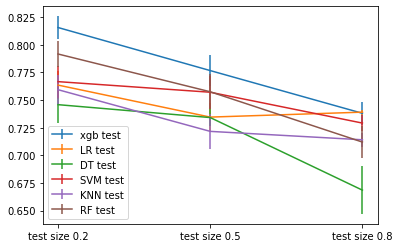

In [28]:
fig = plt.figure()

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[0][0],test_acc_p2[0][0],test_acc_p3[0][0]]
             , yerr=[test_acc_p1[0][1],test_acc_p2[0][1],test_acc_p3[0][1]],label='xgb test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[1][0],test_acc_p2[1][0],test_acc_p3[1][0]]
             , yerr=[test_acc_p1[1][1],test_acc_p2[1][1],test_acc_p3[1][1]],label='LR test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[2][0],test_acc_p2[2][0],test_acc_p3[2][0]]
             , yerr=[test_acc_p1[2][1],test_acc_p2[2][1],test_acc_p3[2][1]],label='DT test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[3][0],test_acc_p2[3][0],test_acc_p3[3][0]]
             , yerr=[test_acc_p1[3][1],test_acc_p2[3][1],test_acc_p3[3][1]],label='SVM test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[4][0],test_acc_p2[4][0],test_acc_p3[4][0]]
             , yerr=[test_acc_p1[4][1],test_acc_p2[4][1],test_acc_p3[4][1]],label='KNN test')

plt.errorbar(['test size 0.2','test size 0.5','test size 0.8'],[test_acc_p1[5][0],test_acc_p2[5][0],test_acc_p3[5][0]]
             , yerr=[test_acc_p1[5][1],test_acc_p2[5][1],test_acc_p3[5][1]],label='RF test')
plt.legend()
plt.show()


In [ ]:
#below is cv randomness

In [ ]:
xgb {'gamma': 0.01, 'max_depth': 7} 0.7959343236903831 test size 0.2
LR {'C': 0.1} 0.7365129007036747 test size 0.2
DT {'max_depth': 8} 0.7365129007036747 test size 0.2
SVM {'C': 10} 0.764659890539484 test size 0.2
KNN {'n_neighbors': 1} 0.7568412822517592 test size 0.2
RF {'max_depth': 100} 0.7834245504300235 test size 0.2

xgb {'gamma': 0.01, 'max_depth': 7} 0.7959343236903831 test size 0.2
LR {'C': 0.1} 0.7365129007036747 test size 0.2
DT {'max_depth': 8} 0.7388584831899921 test size 0.2
SVM {'C': 10} 0.764659890539484 test size 0.2
KNN {'n_neighbors': 1} 0.7568412822517592 test size 0.2
RF {'max_depth': 100} 0.784206411258796 test size 0.2

xgb {'gamma': 0.01, 'max_depth': 7} 0.7959343236903831 test size 0.2
LR {'C': 0.1} 0.7365129007036747 test size 0.2
DT {'max_depth': 8} 0.7302580140734949 test size 0.2
SVM {'C': 10} 0.764659890539484 test size 0.2
KNN {'n_neighbors': 1} 0.7568412822517592 test size 0.2
RF {'max_depth': 10} 0.777951524628616 test size 0.2

In [ ]:
xgb {'gamma': 0.01, 'max_depth': 5} 0.795 test size 0.2
LR {'C': 10} 0.76375 test size 0.2
DT {'max_depth': 8} 0.75625 test size 0.2
SVM {'C': 10} 0.77125 test size 0.2
KNN {'n_neighbors': 5} 0.7475 test size 0.2
RF {'max_depth': 50} 0.785 test size 0.2

xgb {'gamma': 0.01, 'max_depth': 5} 0.795 test size 0.2
LR {'C': 10} 0.76375 test size 0.2
DT {'max_depth': 8} 0.7525 test size 0.2
SVM {'C': 10} 0.77125 test size 0.2
KNN {'n_neighbors': 5} 0.7475 test size 0.2
RF {'max_depth': 10} 0.78 test size 0.2

xgb {'gamma': 0.01, 'max_depth': 5} 0.795 test size 0.2
LR {'C': 10} 0.76375 test size 0.2
DT {'max_depth': 8} 0.7625 test size 0.2
SVM {'C': 10} 0.77125 test size 0.2
KNN {'n_neighbors': 5} 0.7475 test size 0.2
RF {'max_depth': 100} 0.78625 test size 0.2

In [ ]:

xgb {'gamma': 0.5, 'max_depth': 10} 0.86925 test size 0.2
LR {'C': 10} 0.78925 test size 0.2
DT {'max_depth': 8} 0.82525 test size 0.2
SVM {'C': 10} 0.86425 test size 0.2
KNN {'n_neighbors': 5} 0.81775 test size 0.2
RF {'max_depth': 10} 0.85625 test size 0.2

xgb {'gamma': 0.5, 'max_depth': 10} 0.86925 test size 0.2
LR {'C': 10} 0.78925 test size 0.2
DT {'max_depth': 8} 0.8265 test size 0.2
VM {'C': 10} 0.86425 test size 0.2
KNN {'n_neighbors': 5} 0.81775 test size 0.2
RF {'max_depth': 100} 0.85475 test size 0.2

xgb {'gamma': 0.5, 'max_depth': 10} 0.86925 test size 0.2
LR {'C': 10} 0.78925 test size 0.2
DT {'max_depth': 8} 0.8275 test size 0.2
SVM {'C': 10} 0.86425 test size 0.2
KNN {'n_neighbors': 5} 0.81775 test size 0.2
RF {'max_depth': 10} 0.85325 test size 0.2

xgb {'gamma': 0.1, 'max_depth': 5} 0.871 test size 0.2
LR {'C': 0.1} 0.79 test size 0.2
DT {'max_depth': 8} 0.827 test size 0.2
SVM {'C': 100} 0.868 test size 0.2
KNN {'n_neighbors': 5} 0.817 test size 0.2
RF {'max_depth': 100} 0.85475 test size 0.2

xgb {'gamma': 0.1, 'max_depth': 5} 0.871 test size 0.2
LR {'C': 0.1} 0.79 test size 0.2
DT {'max_depth': 8} 0.82675 test size 0.2
SVM {'C': 100} 0.868 test size 0.2
KNN {'n_neighbors': 5} 0.817 test size 0.2
RF {'max_depth': 10} 0.85625 test size 0.2

xgb {'gamma': 0.1, 'max_depth': 5} 0.871 test size 0.2
LR {'C': 0.1} 0.79 test size 0.2
DT {'max_depth': 8} 0.83 test size 0.2
SVM {'C': 100} 0.868 test size 0.2
KNN {'n_neighbors': 5} 0.817 test size 0.2
RF {'max_depth': 10} 0.856 test size 0.2

In [78]:
# Draw the heatmap of training errors.
def draw_heatmap(training_errors, gamma_list, C_list, x_name, y_name, title):
    plt.figure(figsize = (5,5))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '%s'%(x_name), ylabel='%s'%(y_name))#'$\gamma$', ylabel='$C$')
    plt.title('Validation accuracy of %s' % (title))
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()


In [79]:
# Draw the heatmap of training errors.
def draw_heatmap1d(training_errors, gamma_list, y_name,title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f', 
                     yticklabels=gamma_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set( ylabel='%s'%(y_name))#'$\gamma$', ylabel='$C$')
    plt.title('Validation accuracy of %s' % (title))
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

In [91]:
#results
#np.array(results)
#for i in range(len(result)):
#+results[1][2]+results[2][2]
val_acc_xgb_p1 = (validation[0][1]+validation[6][1]+validation[12][1])/3
val_acc_xgb_p2 = (validation[18][1]+validation[24][1]+validation[30][1])/3
val_acc_xgb_p3 = (validation[36][1]+validation[42][1]+validation[48][1])/3

val_acc_LR_p1 = (validation[1][1]+validation[7][1]+validation[13][1])/3
val_acc_LR_p2 = (validation[19][1]+validation[25][1]+validation[31][1])/3
val_acc_LR_p3 = (validation[37][1]+validation[43][1]+validation[49][1])/3

val_acc_DT_p1 = (validation[2][1]+validation[8][1]+validation[14][1])/3
val_acc_DT_p2 = (validation[20][1]+validation[26][1]+validation[32][1])/3
val_acc_DT_p3 = (validation[38][1]+validation[44][1]+validation[50][1])/3

val_acc_SVM_p1 = (validation[3][1]+validation[9][1]+validation[15][1])/3
val_acc_SVM_p2 = (validation[21][1]+validation[27][1]+validation[33][1])/3
val_acc_SVM_p3 = (validation[39][1]+validation[45][1]+validation[51][1])/3

val_acc_KNN_p1 = (validation[4][1]+validation[10][1]+validation[16][1])/3
val_acc_KNN_p2 = (validation[22][1]+validation[28][1]+validation[34][1])/3
val_acc_KNN_p3 = (validation[40][1]+validation[46][1]+validation[52][1])/3

val_acc_RF_p1 = (validation[5][1]+validation[11][1]+validation[17][1])/3
val_acc_RF_p2 = (validation[23][1]+validation[29][1]+validation[35][1])/3
val_acc_RF_p3 = (validation[41][1]+validation[47][1]+validation[53][1])/3

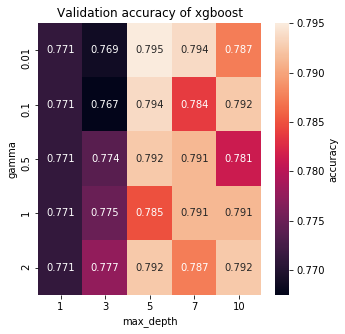

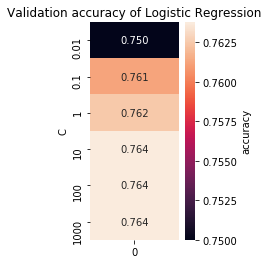

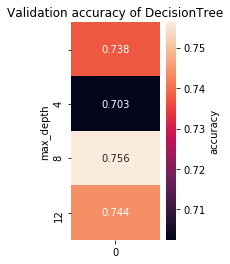

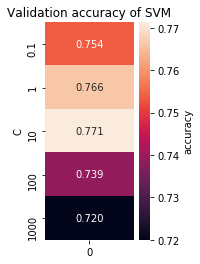

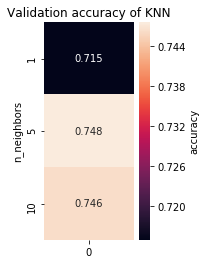

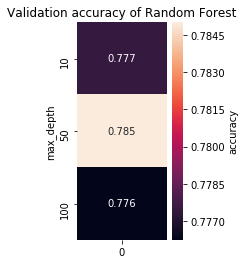

In [81]:
#Some examples of the heatmap
val_acc =np.reshape(results[0][0].cv_results_['mean_test_score'],(5,5))
draw_heatmap(val_acc,[1,3,5,7,10],[0.01,0.1,0.5,1,2],'max_depth','gamma','xgboost' )

val_acc =np.reshape(results[1][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[0.01,0.1,1,10,100,1000],'C','Logistic Regression')

val_acc =np.reshape(results[2][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[None,4,8,12],'max_depth','DecisionTree')

val_acc =np.reshape(results[3][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[0.1,1,10,100,1000],'C','SVM')

val_acc =np.reshape(results[4][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[1,5,10],'n_neighbors','KNN')

val_acc =np.reshape(results[5][0].cv_results_['mean_test_score'],(-1,1))
draw_heatmap1d(val_acc,[10,50,100],'max_depth','Random Forest')

In [32]:
#loadtest
#array2 = dataset.values
#np.random.shuffle(array2)
#data_test = array2[5000:10000,:]
#data_test

array([[ 53.051 ,   8.7223,   2.8438, ...,  68.4705, 250.0441,   1.    ],
       [ 17.2563,  12.8329,   2.5496, ...,  32.4323, 138.061 ,   0.    ],
       [ 12.6471,  11.7783,   2.1569, ...,  31.776 , 172.725 ,   0.    ],
       ...,
       [ 17.3028,  10.9575,   2.3674, ...,  50.682 , 195.452 ,   0.    ],
       [ 43.3156,  26.1589,   3.3175, ...,   2.0615, 119.24  ,   0.    ],
       [ 19.7692,  15.8392,   2.6821, ...,  83.8778,  50.7506,   0.    ]])

In [92]:
valset = []
rescaled_X_val_one = scaler_one.transform(X_test_one)
rescaled_X_val_two = scaler_two.transform(X_test_two)
rescaled_X_val_three = scaler_three.transform(X_test_three)
valset.append((rescaled_X_val_one,Y_test_one,'test size 0.2'))
valset.append((rescaled_X_val_two,Y_test_two, 'test size 0.5'))
valset.append((rescaled_X_val_three,Y_test_three, 'test size 0.8'))

print((valset[0][0].shape,valset[0][1].shape))

((320, 11), (320,))


In [96]:
best = xgb.XGBClassifier(gamma = 0.01,max_depth=5)
#xgb_best_fit_result = []
xgb_loss = []
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
       # xgb_loss.append(best.evals_result())
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        #test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, test_error))
    count = count+1

final_result_p1=[]
final_result_p2=[]
final_result_p3=[]
train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
#test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
#test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
#test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append(('xgb',train_error_p1,val_acc_xgb_p1,test_error_p1))
final_result_p2.append(('xgb',train_error_p2,val_acc_xgb_p2,test_error_p2))
final_result_p3.append(('xgb',train_error_p3,val_acc_xgb_p3,test_error_p3))

In [97]:
best = LogisticRegression(C=10)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('LR',train_error_p1,val_acc_LR_p1,test_error_p1))
final_result_p2.append(('LR',train_error_p2,val_acc_LR_p2,test_error_p2))
final_result_p3.append(('LR',train_error_p3,val_acc_LR_p3,test_error_p3))

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

In [99]:
best = DecisionTreeClassifier(max_depth=8)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('DT',train_error_p1,val_acc_DT_p1,test_error_p1))
final_result_p2.append(('DT',train_error_p2,val_acc_DT_p2,test_error_p2))
final_result_p3.append(('DT',train_error_p3,val_acc_DT_p3,test_error_p3))

In [100]:
best = SVC(C=10)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('SVM',train_error_p1,val_acc_SVM_p1,test_error_p1))
final_result_p2.append(('SVM',train_error_p2,val_acc_SVM_p2,test_error_p2))
final_result_p3.append(('SVM',train_error_p3,val_acc_SVM_p3,test_error_p3))

In [101]:
best = KNeighborsClassifier(n_neighbors=5)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('KNN',train_error_p1,val_acc_KNN_p1,test_error_p1))
final_result_p2.append(('KNN',train_error_p2,val_acc_KNN_p2,test_error_p2))
final_result_p3.append(('KNN',train_error_p3,val_acc_KNN_p3,test_error_p3))

In [102]:
best = RandomForestClassifier(max_depth=100)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        temp.append((train_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
test_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
test_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
test_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
final_result_p1.append(('RF',train_error_p1,val_acc_RF_p1,test_error_p1))
final_result_p2.append(('RF',train_error_p2,val_acc_RF_p2,test_error_p2))
final_result_p3.append(('RF',train_error_p3,val_acc_RF_p3,test_error_p3))

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [66]:
best = xgb.XGBClassifier(gamma = 0.01,max_depth=5)
#xgb_best_fit_result = []
xgb_loss = []
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
       # xgb_loss.append(best.evals_result())
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        test_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        #test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, test_error))
    count = count+1

final_result_p1=[]
final_result_p2=[]
final_result_p3=[]
train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
val_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
val_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
val_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
#test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
#test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
#test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append(('xgb',train_error_p1,val_error_p1))
final_result_p2.append(('xgb',train_error_p2,val_error_p2))
final_result_p3.append(('xgb',train_error_p3,val_error_p3))

best = LogisticRegression(C=10)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        val_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, val_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
val_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
val_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
val_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append(('LR',train_error_p1,val_error_p1, test_error_p1))
final_result_p2.append(('LR',train_error_p2,val_error_p2, test_error_p2))
final_result_p3.append(('LR',train_error_p3,val_error_p3, test_error_p3))

best = DecisionTreeClassifier(max_depth=8)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        val_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, val_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
val_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
val_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
val_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append(('DT',train_error_p1,val_error_p1, test_error_p1))
final_result_p2.append(('DT',train_error_p2,val_error_p2, test_error_p2))
final_result_p3.append(('DT',train_error_p3,val_error_p3, test_error_p3))

best = SVC(C=10)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        val_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, val_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
val_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
val_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
val_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append(('SVM',train_error_p1,val_error_p1, test_error_p1))
final_result_p2.append(('SVM',train_error_p2,val_error_p2, test_error_p2))
final_result_p3.append(('SVM',train_error_p3,val_error_p3, test_error_p3))

best = KNeighborsClassifier(n_neighbors=5)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        val_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, val_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
val_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
val_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
val_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append(('KNN',train_error_p1,val_error_p1, test_error_p1))
final_result_p2.append(('KNN',train_error_p2,val_error_p2, test_error_p2))
final_result_p3.append(('KNN',train_error_p3,val_error_p3, test_error_p3))

best = RandomForestClassifier(max_depth=100)
temp = []
count=0
for train in partition:
    for i in range(3):        
        best_fit = best.fit(train[0],train[1])
        train_error = accuracy_score(best_fit.predict(train[0]),train[1])
        val_error = accuracy_score(best_fit.predict(valset[count][0]),valset[count][1])
        test_error = accuracy_score(best_fit.predict(data_test[:,:-1]),data_test[:,-1])
        temp.append((train_error, val_error, test_error))
    count = count+1

train_error_p1 = (temp[0][0]+temp[1][0]+temp[2][0])/3
#temp[0][0]+temp[1][0]+temp[2][0] #std
train_error_p2 = (temp[3][0]+temp[4][0]+temp[5][0])/3
train_error_p3 = (temp[6][0]+temp[7][0]+temp[8][0])/3
val_error_p1 = (temp[0][1]+temp[1][1]+temp[2][1])/3
val_error_p2 = (temp[3][1]+temp[4][1]+temp[5][1])/3
val_error_p3 = (temp[6][1]+temp[7][1]+temp[8][1])/3
test_error_p1 = (temp[0][2]+temp[1][2]+temp[2][2])/3
test_error_p2 = (temp[3][2]+temp[4][2]+temp[5][2])/3
test_error_p3 = (temp[6][2]+temp[7][2]+temp[8][2])/3
final_result_p1.append(('RF',train_error_p1,val_error_p1, test_error_p1))
final_result_p2.append(('RF',train_error_p2,val_error_p2, test_error_p2))
final_result_p3.append(('RF',train_error_p3,val_error_p3, test_error_p3))

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

In [103]:
final_result_p1

[('xgb', 0.9585613760750586, 0.7959343236903832, 0.7937499999999998),
 ('LR', 0.746677091477717, 0.7365129007036747, 0.7468749999999998),
 ('DT', 0.8944487881157154, 0.7305186343497524, 0.75),
 ('SVM', 0.8537920250195464, 0.764659890539484, 0.728125),
 ('KNN', 0.8178264268960125, 0.7568412822517591, 0.7125),
 ('RF', 0.9893145686734428, 0.7797758665624186, 0.7843749999999999)]

In [104]:
table_p1 = pd.DataFrame(np.array(final_result_p1),columns=['classifier','train_accuracy', 'val_accuracy', 'test_accuracy'])
table_p2 = pd.DataFrame(np.array(final_result_p2),columns=['classifier','train_accuracy', 'val_accuracy', 'test_accuracy'])
table_p3 = pd.DataFrame(np.array(final_result_p3),columns=['classifier','train_accuracy', 'val_accuracy', 'test_accuracy'])
table_p1

,classifier,train_accuracy,val_accuracy,test_accuracy
0,xgb,0.9585613760750586,0.7959343236903832,0.7937499999999998
1,LR,0.746677091477717,0.7365129007036747,0.7468749999999998
2,DT,0.8944487881157154,0.7305186343497524,0.75
3,SVM,0.8537920250195464,0.764659890539484,0.728125
4,KNN,0.8178264268960125,0.7568412822517591,0.7125
5,RF,0.9893145686734428,0.7797758665624186,0.7843749999999999


In [105]:
table_p2

,classifier,train_accuracy,val_accuracy,test_accuracy
0,xgb,0.9899874843554443,0.7934918648310388,0.77625
1,LR,0.7571964956195244,0.7434292866082602,0.7375000000000002
2,DT,0.9261576971214017,0.7138089278264497,0.72375
3,SVM,0.867334167709637,0.7647058823529411,0.7512500000000001
4,KNN,0.8197747183979974,0.7371714643304129,0.71875
5,RF,0.9883187317480183,0.7751355861493533,0.73875


In [106]:
table_p3

,classifier,train_accuracy,val_accuracy,test_accuracy
0,xgb,1.0,0.7617554858934169,0.7421875
1,LR,0.7648902821316614,0.7523510971786834,0.740625
2,DT,0.9686520376175548,0.7272727272727272,0.7145833333333332
3,SVM,0.90282131661442,0.74294670846395,0.709375
4,KNN,0.8150470219435736,0.677115987460815,0.69296875
5,RF,0.9811912225705329,0.7136886102403345,0.7291666666666666


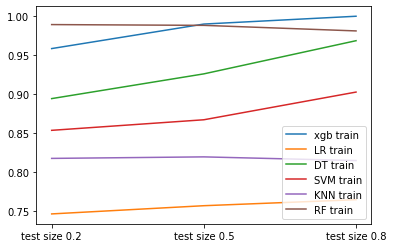

In [107]:
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[0][1],final_result_p2[0][1],final_result_p3[0][1]],label='xgb train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[1][1],final_result_p2[1][1],final_result_p3[1][1]],label='LR train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[2][1],final_result_p2[2][1],final_result_p3[2][1]],label='DT train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[3][1],final_result_p2[3][1],final_result_p3[3][1]],label='SVM train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[4][1],final_result_p2[4][1],final_result_p3[4][1]],label='KNN train')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[5][1],final_result_p2[5][1],final_result_p3[5][1]],label='RF train')
plt.legend()
plt.show()

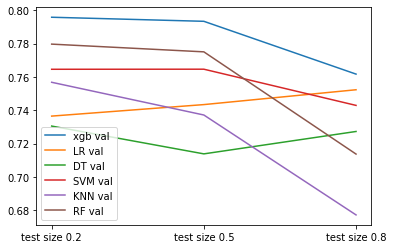

In [108]:
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[0][2],final_result_p2[0][2],final_result_p3[0][2]],label='xgb val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[1][2],final_result_p2[1][2],final_result_p3[1][2]],label='LR val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[2][2],final_result_p2[2][2],final_result_p3[2][2]],label='DT val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[3][2],final_result_p2[3][2],final_result_p3[3][2]],label='SVM val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[4][2],final_result_p2[4][2],final_result_p3[4][2]],label='KNN val')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[5][2],final_result_p2[5][2],final_result_p3[5][2]],label='RF val')
plt.legend()
plt.show()

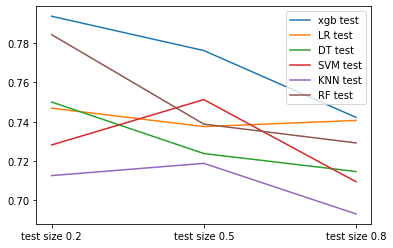

In [109]:

plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[0][3],final_result_p2[0][3],final_result_p3[0][3]],label='xgb test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[1][3],final_result_p2[1][3],final_result_p3[1][3]],label='LR test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[2][3],final_result_p2[2][3],final_result_p3[2][3]],label='DT test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[3][3],final_result_p2[3][3],final_result_p3[3][3]],label='SVM test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[4][3],final_result_p2[4][3],final_result_p3[4][3]],label='KNN test')
plt.plot(['test size 0.2','test size 0.5','test size 0.8'],[final_result_p1[5][3],final_result_p2[5][3],final_result_p3[5][3]],label='RF test')
plt.legend()
plt.show()

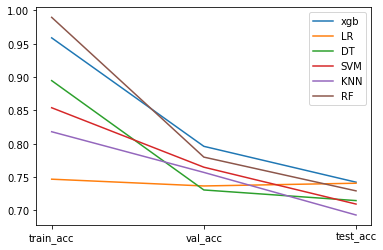

In [110]:
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[0][1],final_result_p1[0][2],final_result_p3[0][3]],label='xgb')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[1][1],final_result_p1[1][2],final_result_p3[1][3]],label='LR')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[2][1],final_result_p1[2][2],final_result_p3[2][3]],label='DT')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[3][1],final_result_p1[3][2],final_result_p3[3][3]],label='SVM')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[4][1],final_result_p1[4][2],final_result_p3[4][3]],label='KNN')
plt.plot(['train_acc','val_acc','test_acc'],[final_result_p1[5][1],final_result_p1[5][2],final_result_p3[5][3]],label='RF')
plt.legend()
plt.show()